In [2]:
from utils.data_utils import find_time_match_info
import pickle
from glob import glob
import os
from tqdm import tqdm_notebook
import json

In [3]:
imgpath = glob('D:\dagger/*')

In [3]:
for path in tqdm_notebook(imgpath):
    try:
        find_time_match_info(path)
    except:
        continue
    info_dict = pickle.load(open(os.path.join(path,'info_match.p'),'rb'))
    dagger_info =  pickle.load(open(os.path.join(path,'label.pkl'),'rb'))
    dagger_info = zip(dagger_info[0::2], dagger_info[1::2])
    info_parsed = {}
    dagger = next(dagger_info)
    for i in sorted(info_dict):
        time = float(i)
        frame = info_dict[i]
        info_parsed[i] = {}
        info_parsed[i]['throttle'] = frame['throttle']
        info_parsed[i]['brake'] = frame['brake']
        info_parsed[i]['steering'] = frame['steering']
        info_parsed[i]['speed'] = frame['speed']
        info_parsed[i]['yawRate'] = frame['yawRate']
        info_parsed[i]['location'] = frame['location']
        if time>dagger[1]*1000:
            try:
                dagger = next(dagger_info)
            except:
                pass
        if dagger[0]*1000+500<time<dagger[1]*1000-500:
            info_parsed[i]['dagger'] = False
        else:
            info_parsed[i]['dagger'] = True
    json.dump(info_parsed,open(os.path.join(path,'parsedinfo.json'),'w'),indent=2)

A Jupyter Widget

D:\dagger\rec_05152113_clouds_14h37m_x1048y-1232tox649y-1192\info.gz
993 3427 3204
==> Average min error: 5.920443101711984MS
==> Average min error: 0.0MS
==> Max error: 10MS in frame570
D:\dagger\rec_05152116_clouds_14h59m_x-1469y-776tox-1361y-1119\info.gz
2002 6454 6211
==> Average min error: 7.848651348651349MS
==> Average min error: 0.0MS
==> Max error: 18MS in frame55
D:\dagger\rec_05152121_clouds_10h57m_x662y-225tox1040y-1035\info.gz
1983 6337 6199
==> Average min error: 7.395360564800807MS
==> Average min error: 0.0MS
==> Max error: 10MS in frame123
D:\dagger\rec_05152126_clouds_13h56m_x1052y-1310tox692y-994\info.gz
1962 6134 5989
==> Average min error: 7.36901121304791MS
==> Average min error: 0.0MS
==> Max error: 12MS in frame877
D:\dagger\rec_05152135_clouds_14h44m_x-412y-575tox-1081y156\info.gz
1862 5858 5722
==> Average min error: 7.744897959183674MS
==> Average min error: 0.0MS
==> Max error: 14MS in frame150
D:\dagger\rec_05152140_clouds_11h24m_x479y-1218tox1042y-977\info

==> Average min error: 0.0MS
==> Max error: 11MS in frame723
D:\dagger\rec_05160028_clouds_13h38m_x749y-1204tox1364y-742\info.gz
2028 6372 6178
==> Average min error: 7.452662721893491MS
==> Average min error: 0.0MS
==> Max error: 12MS in frame670
D:\dagger\rec_05160033_clouds_12h39m_x1055y-1384tox1247y-1878\info.gz
750 2489 2276
==> Average min error: 7.041333333333333MS
==> Average min error: 0.0MS
==> Max error: 10MS in frame378
D:\dagger\rec_05160035_clouds_9h6m_x726y-1222tox-252y-1245\info.gz
2116 7263 7076
==> Average min error: 7.185255198487713MS
==> Average min error: 0.0MS
==> Max error: 11MS in frame791
D:\dagger\rec_05160040_clouds_9h38m_x1040y-1035tox581y-1194\info.gz
1124 3620 3482
==> Average min error: 6.820284697508897MS
==> Average min error: 0.0MS
==> Max error: 9MS in frame290
D:\dagger\rec_05160043_clouds_18h1m_x786y-1219tox1229y-1172\info.gz
943 3144 2925
==> Average min error: 6.957582184517498MS
==> Average min error: 0.0MS
==> Max error: 14MS in frame932
D:\dag

In [100]:
dagger = next(dagger_info)

In [103]:
dagger[0] < 1524967593662< dagger[i]

False

In [4]:
for path in tqdm_notebook(imgpath):
    try:
        parsedinfo = json.load(open(os.path.join(path,'parsedinfo.json'),'r'))
    except:
        pass
    sortedtime = sorted(parsedinfo.keys())
    for idx, t in enumerate(sortedtime):
        frame = parsedinfo[t]
        if idx+12>len(sortedtime):
            avgrawrate = sum([parsedinfo[sortedtime[i]]['yawRate'] for i in range(idx, len(sortedtime))])/(len(sortedtime)-idx)
        else:
            avgrawrate = sum([parsedinfo[sortedtime[i]]['yawRate'] for i in range(idx+6, idx+12)])/6
        parsedinfo[t]['avgyawRate'] = avgrawrate
    json.dump(parsedinfo,open(os.path.join(path,'parsedinfo.json'),'w'),indent=2)

A Jupyter Widget

In [10]:
[parsedinfo[sortedtime[i]]['yawRate']

SyntaxError: unexpected EOF while parsing (<ipython-input-10-e58294e5db9f>, line 1)

In [10]:
speed = []
thottle = []
brake = []
steering = []
angle = []
img = []

In [11]:
os.path.relpath(imgpath[0],'D:\dagger')

'rec_05152113_clouds_14h37m_x1048y-1232tox649y-1192'

In [12]:
for path in tqdm_notebook(imgpath):
    try:
        parsedinfo = json.load(open(os.path.join(path,'parsedinfo.json'),'r'))
    except:
        pass
    sortedtime = sorted(parsedinfo.keys())
    for idx, t in enumerate(sortedtime):
        frame = parsedinfo[t]
        if frame['dagger']:
            continue
        img.append(os.path.join(os.path.relpath(path,'D:\dagger'),str(t)+'_final.png'))
        speed.append(frame['speed'])
        thottle.append(frame['throttle'])
        breakinfo.append(frame['brake'])
        steering.append(frame['steering'])
        angle.append(frame['yawRate'])

A Jupyter Widget

In [16]:
def writelist2txt(thelist, filename):
    with open(filename,'w') as thefile:
        for item in thelist:
            thefile.write("%s\n" % item)

In [27]:
writelist2txt(img, 'img.txt')

In [28]:
len(img)

130839

In [33]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

(-50, 50)

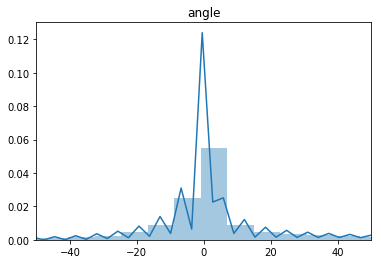

In [43]:
sns.distplot(angle)
plt.title('angle')
plt.xlim(-50,50)

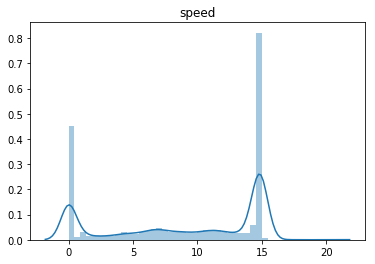

In [38]:
sns.distplot(speed)
plt.title('speed')